In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
#|export
def is_cat(x): return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

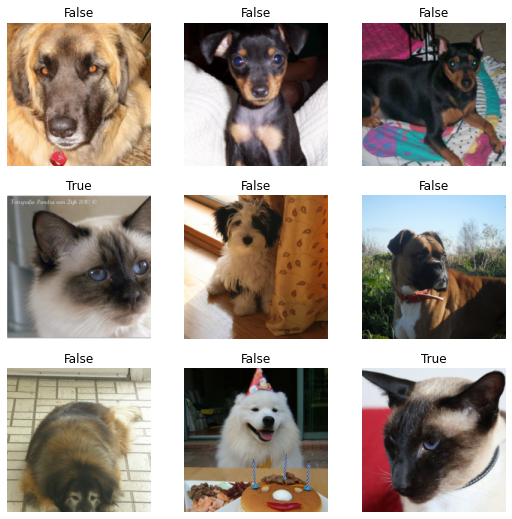

In [6]:
dls.show_batch()

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/anirbanchatterjee/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:02<00:00, 15.8MB/s]
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,0.194456,0.046554,0.014208,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.075600,0.048175,0.016238,01:45
1,0.044500,0.026214,0.010825,01:45
2,0.019909,0.014962,0.006089,01:46


In [8]:
learn.export('model.pkl')

In [9]:
#|export
learn1 = load_learner('model.pkl')

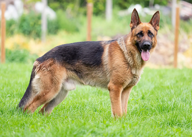

In [16]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [10]:
#|export
labels = learn1.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn1.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [32]:
predict(im)

{False: 0.9990921020507812, True: 0.0009078904404304922}

In [18]:
print(labels)

[False, True]


In [23]:
import pandas as pd


In [20]:
!pip install --force-reinstall gradio==3.50
# import gradio as gr
# gr.Interface(fn=predict, inputs=gr.inputs., outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

  Using cached gradio-3.50.0-py3-none-any.whl (20.3 MB)
     |████████████████████████████████| 197 kB 3.7 MB/s eta 0:00:01
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
     |████████████████████████████████| 7.6 MB 7.7 MB/s eta 0:00:01
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 62 kB 7.8 MB/s  eta 0:00:01
  Using cached aiofiles-23.2.1-py3-none-any.whl (15 kB)
  Using cached fastapi-0.108.0-py3-none-any.whl (92 kB)
  Using cached orjson-3.9.10-cp39-cp39-macosx_10_15_x86_64.macosx_11_0_arm64.macosx_10_15_universal2.whl (241 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached ffmpy-0.3.1-py3-none-any.whl
  Using cached httpx-0.26.0-py3-none-any.whl (75 kB)
  Using cached uvicorn-0.25.0-py3-none-any.whl (60 kB)
     |████████████████████████████████| 11.8 MB 17.9 MB/s eta 0:00:01
     |███████████████████████████████

      Successfully uninstalled typing-extensions-4.9.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.0.4
    Uninstalling charset-normalizer-2.0.4:
      Successfully uninstalled charset-normalizer-2.0.4
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10

In [33]:
#|export
import gradio as gr
image = gr.Image()

gr.Interface(fn=predict, inputs=image, outputs=labels).launch(inline=False)

AssertionError: 

In [26]:
!pip install nbdev


     |████████████████████████████████| 66 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.5 MB/s eta 0:00:01


ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/nbdev/export.py)

In [27]:
from nbdev.export import notebook2script

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/nbdev/export.py)

In [ ]:
notebook2script('Pets classifier.ipynb')

In [35]:
from fastai.vision.all import *
import gradio as gr
def is_cat(x): return x[0].isupper()
learn1 = load_learner('model.pkl')
categories = ('Dog','Cat')

def classify_images(img):
    pred,idx,probs = learn1.predict(img)
    return dict(zip(categories, map(float,probs)))
image = gr.Image()
label = gr.Label()
intf = gr.Interface(fn=classify_images,inputs=image,outputs=label)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/anyio/_core/_eventloop.py", line 138, in get_asynclib
KeyError: 'anyio._backends._asyncio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/protocols/http/h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/middleware/proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/starlette/applications.py", li

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/anyio/_core/_eventloop.py", line 138, in get_asynclib
KeyError: 'anyio._backends._asyncio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/protocols/http/h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/middleware/proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/starlette/applications.py", li

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/anyio/_core/_eventloop.py", line 138, in get_asynclib
KeyError: 'anyio._backends._asyncio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/protocols/http/h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/middleware/proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/starlette/applications.py", li

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/g8/c8z_xb811ws2xyckgvkr9fdc0000gn/T/ipykernel_8459/4169312387.py", line 13, in <cell line: 13>
    intf.launch(inline=False)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1990, in launch
ValueError: When localhost is not accessible, a shareable link must be created. Please set share=True or check your proxy settings to allow access to localhost.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/s

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/anyio/_core/_eventloop.py", line 138, in get_asynclib
KeyError: 'anyio._backends._asyncio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/protocols/http/h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/uvicorn/middleware/proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/Users/anirbanchatterjee/opt/anaconda3/lib/python3.9/site-packages/starlette/applications.py", li